In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

1.3.2


In [2]:
df = pd.read_csv('./data.csv')

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,availability_365,crimes_neigh,Latitude_block,Longitude_block,CMPLNT_NUM,distance to nearest subway (km),log_price,log_number_of_reviews,log_reviews_per_month,whether_recommend
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,...,365,129370,40.6,-74.0,30593,0.521922,5.010635,2.302585,0.190620,0
1,63546,Large and Cozy Private Bedroom,308652,Antonín,Brooklyn,Kensington,40.64106,-73.97426,Private room,39,...,365,129370,40.6,-74.0,30593,0.677530,3.688879,3.828641,0.378436,0
2,125594,SUPER BIG AND COZY PRIVATE BEDROOM,308652,Antonín,Brooklyn,Kensington,40.64302,-73.97255,Private room,39,...,365,129370,40.6,-74.0,30593,0.785734,3.688879,4.418841,0.662688,0
3,217580,"Luxury Furnished 1 bedro, Bay Ridge",1121193,Samuel,Brooklyn,Fort Hamilton,40.61927,-74.03070,Entire home/apt,100,...,241,129370,40.6,-74.0,30593,0.295155,4.615121,2.079442,0.076961,0
4,219066,"Wonderful Studio In Brooklyn, NY!!!",447754,Yana,Brooklyn,Bensonhurst,40.61922,-73.99399,Entire home/apt,110,...,183,129370,40.6,-74.0,30593,0.420325,4.709530,3.218876,0.231112,0


In [4]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'crimes_neigh', 'Latitude_block', 'Longitude_block',
       'CMPLNT_NUM', 'distance to nearest subway (km)', 'log_price',
       'log_number_of_reviews', 'log_reviews_per_month', 'whether_recommend'],
      dtype='object')

In [5]:
df_std = df.copy()
cols_to_standardize = ['latitude', 'longitude', 'minimum_nights', 'log_number_of_reviews',
                       'log_reviews_per_month', 'calculated_host_listings_count','availability_365', 
                       'CMPLNT_NUM', 'distance to nearest subway (km)','log_price']
df_std[cols_to_standardize] = StandardScaler().fit_transform(df_std[cols_to_standardize])
df_std.agg(['mean','std']).round(2)

/var/folders/x1/w01rc1gd3fz63zzk7t85lxyr0000gn/T/ipykernel_21319/1702614720.py:7: FutureWarning: ['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type', 'last_review'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_std.agg(['mean','std']).round(2)


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,crimes_neigh,Latitude_block,Longitude_block,CMPLNT_NUM,distance to nearest subway (km),log_price,log_number_of_reviews,log_reviews_per_month,whether_recommend
mean,18054936.06,61541702.83,0.0,-0.0,118.50,-0.0,19.78,1.00,0.0,-0.0,116654.24,40.73,-73.95,-0.0,0.0,-0.0,0.0,0.0,0.37
std,10421654.97,73297409.38,1.0,1.0,66.35,1.0,26.72,1.06,1.0,1.0,15552.46,0.06,0.06,1.0,1.0,1.0,1.0,1.0,0.48


# Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

## Linear Regression

In [7]:
df_lr = df.copy()

features = ['neighbourhood_group','neighbourhood', 'latitude', 'longitude', 'room_type', 'minimum_nights', 
            'log_number_of_reviews', 'log_reviews_per_month', 'calculated_host_listings_count',
            'availability_365', 'CMPLNT_NUM', 'distance to nearest subway (km)']

X = df_lr[[col for col in features]]
X_encoded = pd.get_dummies(X,columns = ['neighbourhood','room_type','neighbourhood_group'])
y = df_lr['log_price']
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.25, random_state=42)

In [8]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression().fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
lr_mse = metrics.mean_squared_error(y_test, y_pred)
lr_rmse = np.sqrt(lr_mse)
lr_r2 = metrics.r2_score(y_test, y_pred)

print("Mean Squared Error:", lr_mse)
print("Root Mean Squared Error:", lr_rmse)
print("R-squared:", lr_r2)

Mean Squared Error: 0.12373126480948435
Root Mean Squared Error: 0.3517545519385419
R-squared: 0.6081841661697844


## lasso regressin

In [9]:
features = ['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'minimum_nights', 
            'log_number_of_reviews', 'log_reviews_per_month', 'calculated_host_listings_count',
            'availability_365', 'CMPLNT_NUM', 'distance to nearest subway (km)']

X = df_std[[col for col in features]]
X_encoded = pd.get_dummies(X,columns = ['neighbourhood','room_type','neighbourhood_group'])
y = df_std['log_price']
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.25, random_state=42)

In [10]:
from sklearn.linear_model import Lasso
lasso = Lasso()

param_grid = {'alpha': [0.1, 1, 10, 100],
              'max_iter': [1000, 5000, 10000]}

grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=5)
grid_search.fit(X_encoded, y)
print(f'Best hyperparameters: {grid_search.best_params_}')
print(f'Best score: {grid_search.best_score_}')

lasso = Lasso(alpha=0.01,max_iter = 1000)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

lasso_mse = metrics.mean_squared_error(y_test, y_pred_lasso)
lasso_rmse = np.sqrt(lasso_mse)
lasso_r2 = metrics.r2_score(y_test,y_pred_lasso)
print("Mean Squared Error:", lasso_mse)
print("Root Mean Squared Error:", lasso_rmse)
print("R-squared:", lasso_r2)

Best hyperparameters: {'alpha': 0.1, 'max_iter': 1000}
Best score: 0.3378219223264648
Mean Squared Error: 0.42634523689945014
Root Mean Squared Error: 0.6529511749736348
R-squared: 0.5632532173625352


## ridge regression

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge

ridge = Ridge()
param_grid = {'alpha': [0.1, 1, 10, 100],
              'max_iter': [1000, 5000, 10000]}

grid_search = GridSearchCV(ridge, param_grid=param_grid, cv=5)
grid_search.fit(X_encoded, y)
print(f'Best hyperparameters: {grid_search.best_params_}')
print(f'Best score: {grid_search.best_score_}')

Best hyperparameters: {'alpha': 10, 'max_iter': 1000}
Best score: 0.4682808014417413


In [12]:
ridge = Ridge(alpha=0.01,max_iter = 1000)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
ridge_mse = metrics.mean_squared_error(y_test, y_pred_ridge)
ridge_rmse = np.sqrt(ridge_mse)
ridge_r2 = metrics.r2_score(y_test,y_pred_ridge)
print("Mean Squared Error:", ridge_mse)
print("Root Mean Squared Error:", ridge_rmse)
print("R-squared:", ridge_r2)

Mean Squared Error: 0.3824673267455062
Root Mean Squared Error: 0.6184394285178673
R-squared: 0.6082016169927399


## decision tree regressor

In [13]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state=42)
param_grid = {'max_depth': [2, 5, 10, None],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

grid_search = GridSearchCV(dtr, param_grid=param_grid, cv=5)
grid_search.fit(X_encoded, y)

print(f'Best hyperparameters: {grid_search.best_params_}')
print(f'Best score: {grid_search.best_score_}')

Best hyperparameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best score: 0.4944923894494849


In [14]:
dtr = DecisionTreeRegressor(max_depth=5,min_samples_split=2,min_samples_leaf=1)
dtr.fit(X_train, y_train)
dtr_pred = dtr.predict(X_test)
# Evaluate the model's performance using mean squared error
#evaluation
dtr_mse = metrics.mean_squared_error(y_test, dtr_pred)
dtr_rmse = np.sqrt(dtr_mse)
dtr_r2 = metrics.r2_score(y_test,dtr_pred)
print("Mean Squared Error:", dtr_mse)
print("Root Mean Squared Error:", dtr_rmse)
print("R-squared:", dtr_r2)

Mean Squared Error: 0.39126964352150334
Root Mean Squared Error: 0.625515502223169
R-squared: 0.5991845500738494


## random forest regressor

In [16]:
from sklearn.ensemble import RandomForestRegressor
# rf_model = RandomForestRegressor(max_depth = 10, min_samples_leaf = 4, n_estimators = 200, random_state=42)
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_val_predictions = rf_model.predict(X_test)
rf_mse = metrics.mean_squared_error(y_test, rf_val_predictions)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = metrics.r2_score(y_test, rf_val_predictions)
print("Mean Squared Error:", rf_mse)
print("Root Mean Squared Error:", rf_rmse)
print("R-squared:", rf_r2)

Mean Squared Error: 0.34446379533174104
Root Mean Squared Error: 0.5869103810052614
R-squared: 0.6471323206509544


## Evaluation

In [17]:
evaluation = {'model':['Linear Regression','Lasso','Ridge','Decision Tree','Random Forest'],
             'MSE':[lr_mse,lasso_mse,ridge_mse,dtr_mse,rf_mse],
             'RMSE':[lr_rmse,lasso_rmse,ridge_rmse,dtr_rmse,rf_rmse],
             'R2':[lr_r2,lasso_r2,ridge_r2,dtr_r2,rf_r2]}
eva = pd.DataFrame(evaluation)
eva

,model,MSE,RMSE,R2
0,Linear Regression,0.123731,0.351755,0.608184
1,Lasso,0.426345,0.652951,0.563253
2,Ridge,0.382467,0.618439,0.608202
3,Decision Tree,0.391270,0.625516,0.599185
4,Random Forest,0.344464,0.586910,0.647132


## Linear Regression Analyst

In [18]:
import statsmodels.api as sm

reg = sm.OLS(y, sm.add_constant(X_encoded)).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     221.7
Date:                Wed, 03 Jan 2024   Prob (F-statistic):               0.00
Time:                        21:11:38   Log-Likelihood:                -31795.
No. Observations:               33256   AIC:                         6.405e+04
Df Residuals:                   33028   BIC:                         6.596e+04
Df Model:                         227                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

## Random Forest Analyst

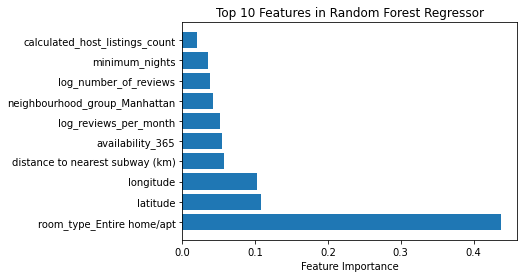

In [19]:
# Initialize and train the random forest regressor
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(X_train, y_train)

# Get the feature importances and sort them in ascending order
importances = rfr.feature_importances_
sorted_idx = importances.argsort()

# Get the top 10 features
top_n = 10
top_idx = sorted_idx[-top_n:]

# Reverse the order of the arrays to plot the features in descending order
top_idx = top_idx[::-1]
importances = importances[top_idx]
feature_names = X_train.columns[top_idx]

# Plot the feature importances in a horizontal bar chart
plt.barh(np.arange(top_n), importances, align='center')
plt.yticks(np.arange(top_n), feature_names)
plt.xlabel('Feature Importance')
plt.title(f'Top {top_n} Features in Random Forest Regressor')
plt.show()

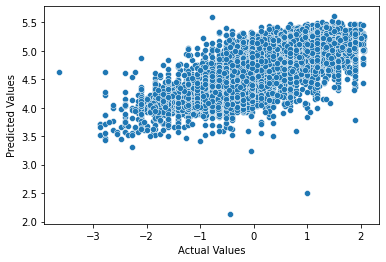

In [20]:
df_pred = pd.DataFrame({'actual': y_test, 'predicted': y_pred})
sns.scatterplot(x='actual', y='predicted', data=df_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

## Stacking

In [21]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

# Split training data into two parts: a training set and a holdout set
X_train_part, X_holdout, y_train_part, y_holdout = train_test_split(X_train, y_train, test_size=0.2, 
                                                                    random_state=42)

# Define base models
base_models = [
    LinearRegression(),
    RandomForestRegressor(n_estimators=100, random_state=42),
    GradientBoostingRegressor(n_estimators=100, random_state=42)
]

# Train base models on training set
base_models_pred = np.zeros((X_holdout.shape[0], len(base_models)))
for i, model in enumerate(base_models):
    model.fit(X_train_part, y_train_part)
    base_models_pred[:, i] = model.predict(X_holdout)

# Train meta-model on holdout set predictions from base models and original targets
meta_model = LinearRegression()
meta_model.fit(base_models_pred, y_holdout)

# Make predictions on test set using the trained meta-model
test_pred = np.zeros((X_test.shape[0], len(base_models)))
for i, model in enumerate(base_models):
    test_pred[:, i] = model.predict(X_test)
stacked_pred = meta_model.predict(test_pred)

# Evaluate performance
mse_stacked = mean_squared_error(y_test, stacked_pred)
print(f"Stacked model MSE: {mse_stacked}")

# Calculate R-squared for stacked model
r2_stacked = r2_score(y_test, stacked_pred)
print(f"Stacked model R-squared: {r2_stacked}")

Stacked model MSE: 0.3318442929281676
Stacked model R-squared: 0.6600597010840711


# Classification - whether recommend

In [33]:
from sklearn.metrics import roc_curve
# from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

In [39]:
df_clf = df.copy()

features = ['neighbourhood_group','latitude', 'longitude', 'neighbourhood','room_type','minimum_nights', 
            'calculated_host_listings_count', 'availability_365','crimes_neigh',
            'CMPLNT_NUM','distance to nearest subway (km)','log_price']
X_clf = df_clf[[col for col in features]]
X_encoded_clf = pd.get_dummies(X_clf,columns = ['room_type','neighbourhood_group','neighbourhood'])

df_clf['whether_recommend'] = (df_clf['reviews_per_month'] > df_clf['reviews_per_month'].mean()).astype(int)
y_clf = df_clf['whether_recommend']

X_train, X_test, y_train, y_test = train_test_split(X_encoded_clf, y_clf, test_size=0.30, random_state=42)

In [40]:
def classif_results(): 
    conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
    print('Confusion matrix:\n', conf_mat)

    labels = ['Class 0', 'Class 1']
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
    fig.colorbar(cax)
    plt.xlabel('Predicted')
    plt.ylabel('Expected')
    plt.show()
    print("Accuracy", metrics.accuracy_score(y_test, y_pred))  
    
    print(classification_report(y_test, y_pred))
    auc = roc_auc_score(y_test, y_pred)
    print("AUC Score: ")
    print(auc)

## GaussianNB

Confusion matrix:
 [[5231 1097]
 [2385 1264]]


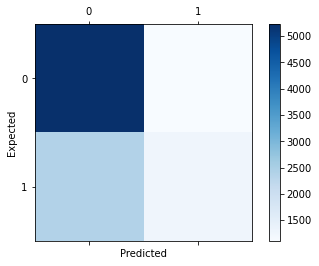

Accuracy 0.650997293775684
              precision    recall  f1-score   support

           0       0.69      0.83      0.75      6328
           1       0.54      0.35      0.42      3649

    accuracy                           0.65      9977
   macro avg       0.61      0.59      0.59      9977
weighted avg       0.63      0.65      0.63      9977

AUC Score: 
0.5865198811028012


In [41]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test,y_pred)

classif_results()

## KNeighborsClassifier

Confusion matrix:
 [[5024 1304]
 [1312 2337]]


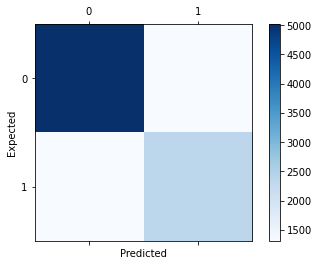

Accuracy 0.7377969329457753
              precision    recall  f1-score   support

           0       0.79      0.79      0.79      6328
           1       0.64      0.64      0.64      3649

    accuracy                           0.74      9977
   macro avg       0.72      0.72      0.72      9977
weighted avg       0.74      0.74      0.74      9977

AUC Score: 
0.7171905850935383


In [42]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test,y_pred)

classif_results()

## DecisionTreeClassifier

Best max_depth: 10
Confusion matrix:
 [[5022 1306]
 [1054 2595]]


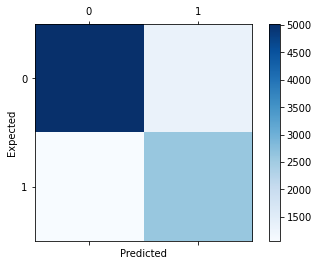

Accuracy 0.7634559486819685
              precision    recall  f1-score   support

           0       0.83      0.79      0.81      6328
           1       0.67      0.71      0.69      3649

    accuracy                           0.76      9977
   macro avg       0.75      0.75      0.75      9977
weighted avg       0.77      0.76      0.77      9977

AUC Score: 
0.752384708554965


In [26]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

depth_range = [2, 5, 10, 20, 50]
scores = []

for d in depth_range:
    dt = DecisionTreeClassifier(max_depth=d, random_state=42)
    score = cross_val_score(dt, X_train, y_train, cv=5).mean()
    scores.append(score)

y_pred = classifier.predict(X_test)

best_depth = depth_range[scores.index(max(scores))]
print("Best max_depth:", best_depth)

dt = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
dt.fit(X_train,y_train)

y_pred = dt.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
classif_results()

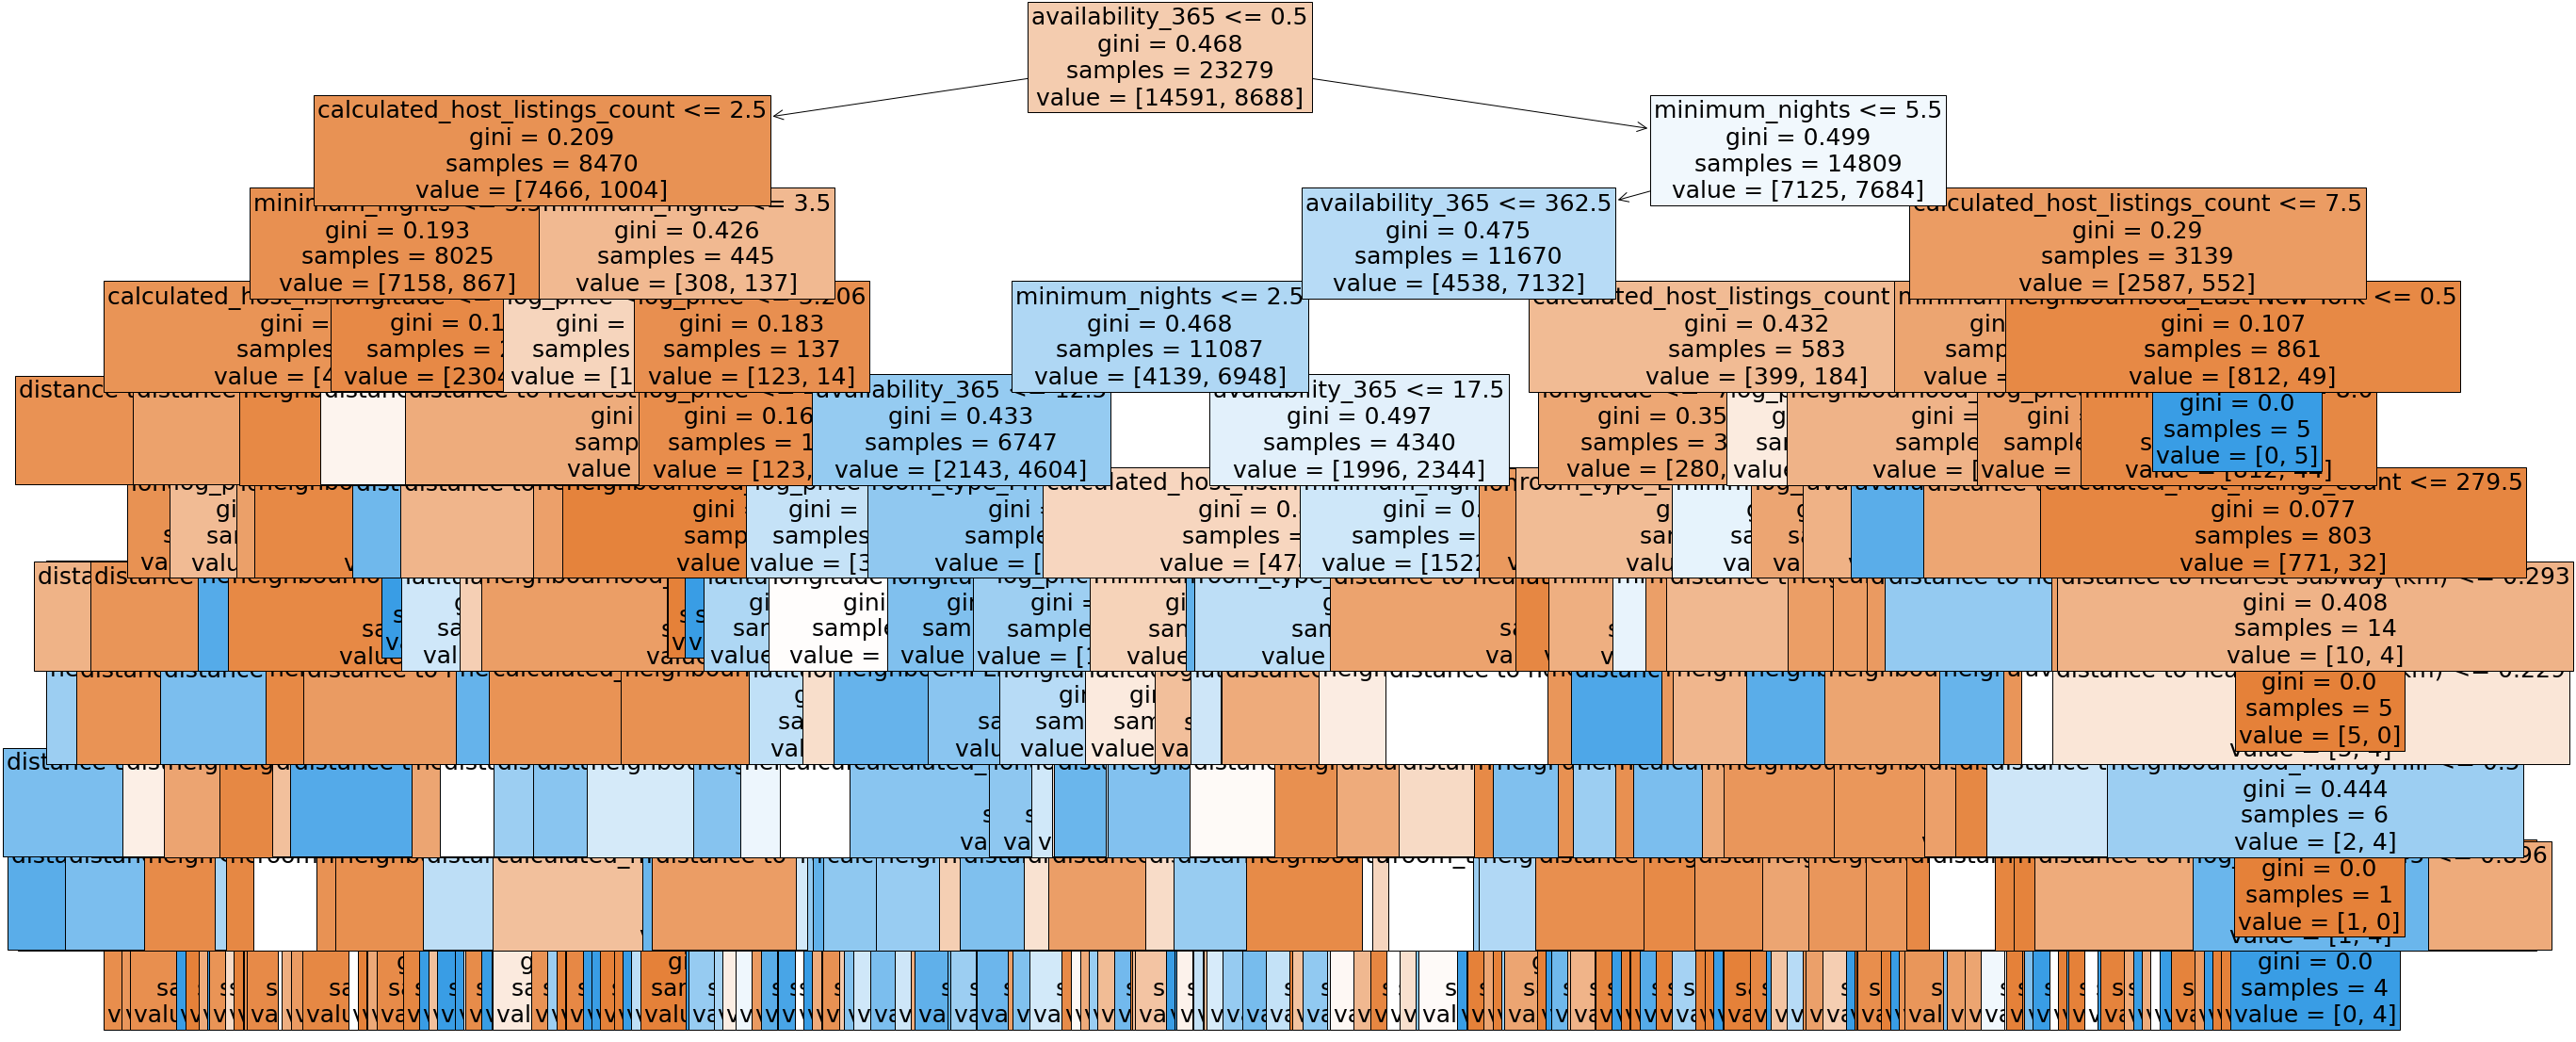

In [27]:
plt.figure(figsize=(40, 20))
plot_tree(dt, filled=True, feature_names=X_train.columns, fontsize=25)
plt.show()

## RandomForestClassifier

/Users/yugii/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 500}
Best score: 0.7640359828141783
Confusion matrix:
 [[5264 1064]
 [1251 2398]]


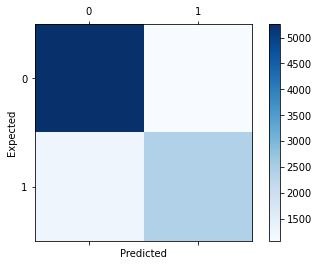

Accuracy 0.7679663225418463
              precision    recall  f1-score   support

           0       0.81      0.83      0.82      6328
           1       0.69      0.66      0.67      3649

    accuracy                           0.77      9977
   macro avg       0.75      0.74      0.75      9977
weighted avg       0.77      0.77      0.77      9977

AUC Score: 
0.7445123770120072


In [28]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [10, 50, 100, 500, 1000],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
#     'bootstrap': [True, False],
#     'criterion': ['gini', 'entropy']
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f'Best hyperparameters: {grid_search.best_params_}')
print(f'Best score: {grid_search.best_score_}')

# Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 
#                        'min_samples_split': 2, 'n_estimators': 1000}
# Best score: 0.7465559776232388

rf_model = RandomForestClassifier(**grid_search.best_params_, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
cm = confusion_matrix(y_test,y_pred)

classif_results()

## Roc_curve

<Figure size 432x288 with 0 Axes>

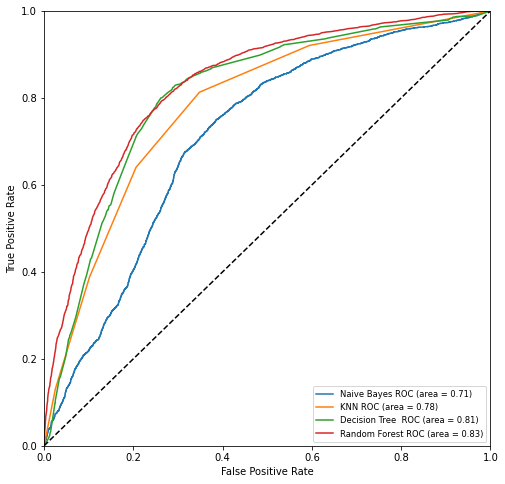

In [29]:
# lr_model = LogisticRegression()
knn_model = KNeighborsClassifier()
nb_model = GaussianNB()
des_model = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
clf_model = RandomForestClassifier(n_estimators=1000, random_state=42)
models = [
  
    {
        'label': 'Naive Bayes',
        'model': nb_model
    },
#     {
#         'label': 'Logistic Regression',
#         'model': lr_model
#     },
    {
        'label': 'KNN',
        'model': knn_model
    },
  
    {
        'label': 'Decision Tree ',
        'model': des_model
    },
    {
        'label': 'Random Forest',
        'model': clf_model
    }
]
from sklearn.metrics import roc_curve, roc_auc_score, auc


plt.clf()
plt.figure(figsize=(8,8))
for m in models:
    m['model'].probability = True
    probas = m['model'].fit(X_train,y_train).predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, probas[:, 1])
    roc_auc  = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=0, fontsize='small')
plt.show()

# Classification - recommend level (by random forest)

In [30]:
import pandas as pd
df_rl = df.copy()
df_rl['level'] = pd.cut(df_rl['reviews_per_month'], bins=4, labels=[1, 2, 3, 4])
df_rl.level.value_counts()

1    22271
2     5685
3     3443
4     1857
Name: level, dtype: int64

In [31]:
%pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [32]:
from sklearn.model_selection import train_test_split
features = ['neighbourhood_group','latitude', 'longitude', 'neighbourhood','room_type','minimum_nights', 
            'calculated_host_listings_count', 'availability_365','crimes_neigh',
            'CMPLNT_NUM','distance to nearest subway (km)','log_price']
X_clf = df_rl[[col for col in features]]
X_encoded_clf = pd.get_dummies(X_clf,columns = ['room_type','neighbourhood_group','neighbourhood'])
y_clf = df_rl['level']

from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_encoded_clf, y_clf)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.30, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(X_encoded_clf, y_clf, test_size=0.30, random_state=42)

ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (/Users/yugii/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/_param_validation.py)

In [ ]:
y_train.value_counts()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
estimators_range = [10, 50, 100, 500, 1000]
scores = []
for n in estimators_range:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    score = cross_val_score(rf, X_train, y_train, cv=5).mean()
    scores.append(score)
    
best_n = estimators_range[scores.index(max(scores))]
print("Best n_estimators:", best_n)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
rf = RandomForestClassifier(n_estimators=best_n, random_state=42)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
classif_results()

In [ ]:
import pandas as pd

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt

def classif_results(): 
    conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
    print('Confusion matrix:\n', conf_mat)

    labels = np.unique(y_test)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
    fig.colorbar(cax)
    ax.set_xticks(np.arange(len(labels)))
    ax.set_yticks(np.arange(len(labels)))
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    plt.xlabel('Predicted')
    plt.ylabel('Expected')
    plt.show()

    print("Accuracy", metrics.accuracy_score(y_test, y_pred))

    print(classification_report(y_test, y_pred))

    n_classes = len(np.unique(y_train))
    y_score = rf.predict_proba(X_test)

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = roc_auc_score(y_test[:, i], y_score[:, i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = roc_auc_score(y_test, y_score, multi_class="ovr")

    # Plot ROC curve for each class
    plt.figure()
    lw = 2
    plt.plot(fpr["micro"], tpr["micro"], color='deeppink', linestyle=':', linewidth=4)
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], lw=lw, label='ROC curve (area = %0.2f) for class %d' % (roc_auc[i], i))
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--', linewidth=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()


# PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

features = ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 
            'availability_365', 'distance to nearest subway (km)']
df_subset = df[features]

scaler = StandardScaler()
df_std = scaler.fit_transform(df_subset)

pca = PCA(n_components=2)

principal_components = pca.fit_transform(df_std)

import matplotlib.pyplot as plt

plt.scatter(principal_components[:, 0], principal_components[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Plot for Airbnb Features')
plt.show()

loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=features)

print(loadings)
